<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/Star_Formation_History/NGC6822_SFH_0008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 616, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 616 (delta 138), reused 244 (delta 118), pack-reused 337
Receiving objects: 100% (616/616), 56.00 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (278/278), done.
Updating files: 100% (77/77), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [4]:
Z = 0.0008
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [83]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [84]:
file_address = '/content/NGC_6822/Data/final_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [85]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


In [86]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [87]:
X = (df['J-Ks'])
Y = (df['Ks'])

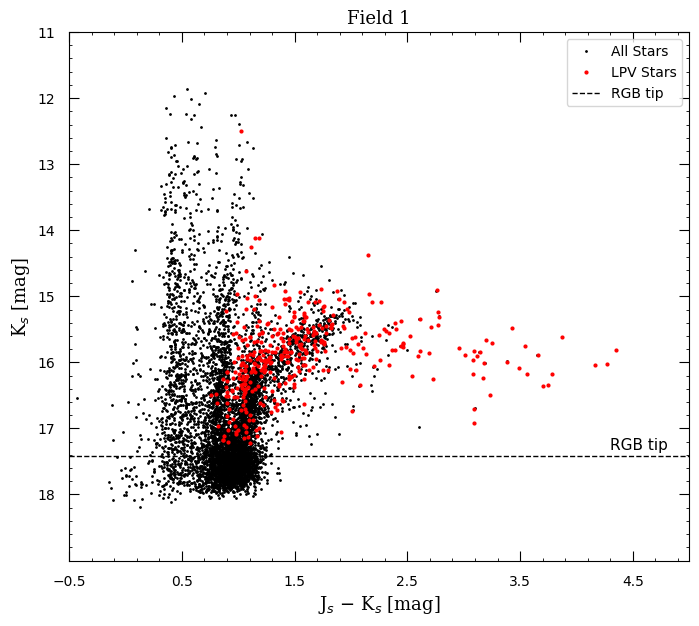

In [88]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [89]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-nxhfbjm2
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-nxhfbjm2
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit cf4cbddb545ca0238704e22e0ccc48ac3e60c5ed
  Preparing metadata (setup.py) ... done


In [90]:
from AstroDC import AstroDC

In [91]:
AstroDC.Stev_Isochrom_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:29:47 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [92]:
AstroDC.Stev_Isochrom_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:31:35 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [93]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.0008,-1.28752,6.60,0.090000,1.081690,0.090,-1.532,3.5126,3.927,0,...,0.000839,8.601,15.637,13.199,11.092,9.800,8.487,7.060,6.381,6.135
1,0.0008,-1.28752,6.60,0.101148,1.180626,0.101,-1.467,3.5194,3.939,0,...,0.000839,8.437,15.277,12.919,10.845,9.577,8.313,6.913,6.231,5.981
2,0.0008,-1.28752,6.60,0.105891,1.218509,0.106,-1.436,3.5221,3.940,0,...,0.000839,8.361,15.108,12.793,10.736,9.478,8.234,6.844,6.161,5.910
3,0.0008,-1.28752,6.60,0.109467,1.245646,0.109,-1.414,3.5242,3.940,0,...,0.000839,8.304,14.979,12.697,10.654,9.403,8.175,6.793,6.109,5.856
4,0.0008,-1.28752,6.60,0.110653,1.254392,0.111,-1.406,3.5249,3.940,0,...,0.000839,8.286,14.939,12.667,10.628,9.379,8.156,6.776,6.092,5.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18932,0.0008,-1.28752,10.05,0.834882,2.430340,0.610,2.912,3.6342,0.800,7,...,0.002033,-2.509,1.867,0.523,-1.063,-1.926,-2.698,-3.798,-4.585,-4.727
18933,0.0008,-1.28752,10.05,0.834885,2.430341,0.575,2.945,3.6368,0.752,7,...,0.002018,-2.592,1.746,0.415,-1.164,-2.022,-2.788,-3.877,-4.653,-4.793
18934,0.0008,-1.28752,10.05,0.834887,2.430341,0.539,2.971,3.6438,0.726,7,...,0.002060,-2.657,1.496,0.246,-1.287,-2.120,-2.870,-3.928,-4.678,-4.813
18935,0.0008,-1.28752,10.05,0.834888,2.430342,0.518,2.980,3.6503,0.726,7,...,0.002081,-2.680,1.285,0.121,-1.362,-2.171,-2.905,-3.934,-4.662,-4.793


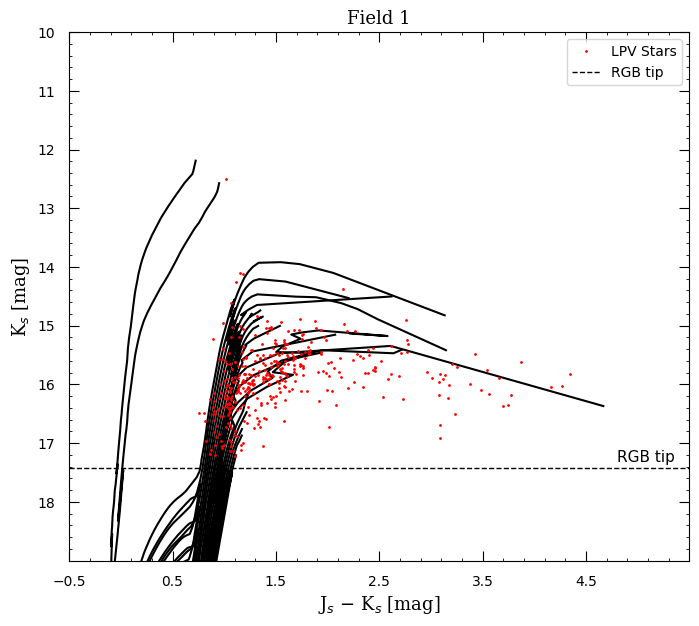

In [94]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [95]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.0008,-1.28752,6.60,0.090000,1.081690,0.090,-1.532,3.5126,3.927,0,...,0.000839,8.601,15.637,13.199,11.092,9.800,8.487,7.060,6.381,6.135
1,0.0008,-1.28752,6.60,0.101148,1.180626,0.101,-1.467,3.5194,3.939,0,...,0.000839,8.437,15.277,12.919,10.845,9.577,8.313,6.913,6.231,5.981
2,0.0008,-1.28752,6.60,0.105891,1.218509,0.106,-1.436,3.5221,3.940,0,...,0.000839,8.361,15.108,12.793,10.736,9.478,8.234,6.844,6.161,5.910
3,0.0008,-1.28752,6.60,0.109467,1.245646,0.109,-1.414,3.5242,3.940,0,...,0.000839,8.304,14.979,12.697,10.654,9.403,8.175,6.793,6.109,5.856
4,0.0008,-1.28752,6.60,0.110653,1.254392,0.111,-1.406,3.5249,3.940,0,...,0.000839,8.286,14.939,12.667,10.628,9.379,8.156,6.776,6.092,5.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19241,0.0008,-1.28752,10.05,0.834882,2.430340,0.610,2.912,3.6342,0.800,7,...,0.002033,-2.509,1.867,0.523,-1.063,-1.926,-2.698,-3.798,-4.585,-4.727
19242,0.0008,-1.28752,10.05,0.834885,2.430341,0.575,2.945,3.6368,0.752,7,...,0.002018,-2.592,1.746,0.415,-1.164,-2.022,-2.788,-3.877,-4.653,-4.793
19243,0.0008,-1.28752,10.05,0.834887,2.430341,0.539,2.971,3.6438,0.726,7,...,0.002060,-2.657,1.496,0.246,-1.287,-2.120,-2.870,-3.928,-4.678,-4.813
19244,0.0008,-1.28752,10.05,0.834888,2.430342,0.518,2.980,3.6503,0.726,7,...,0.002081,-2.680,1.285,0.121,-1.362,-2.171,-2.905,-3.934,-4.662,-4.793


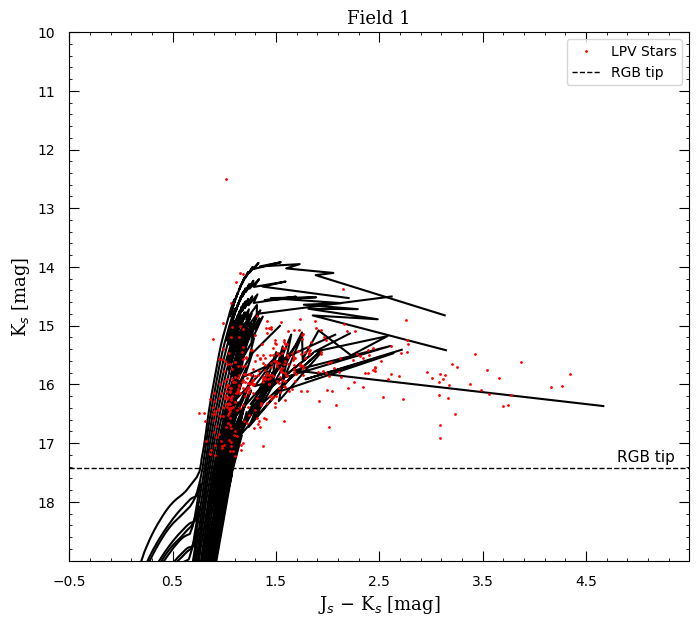

In [96]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [97]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [98]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

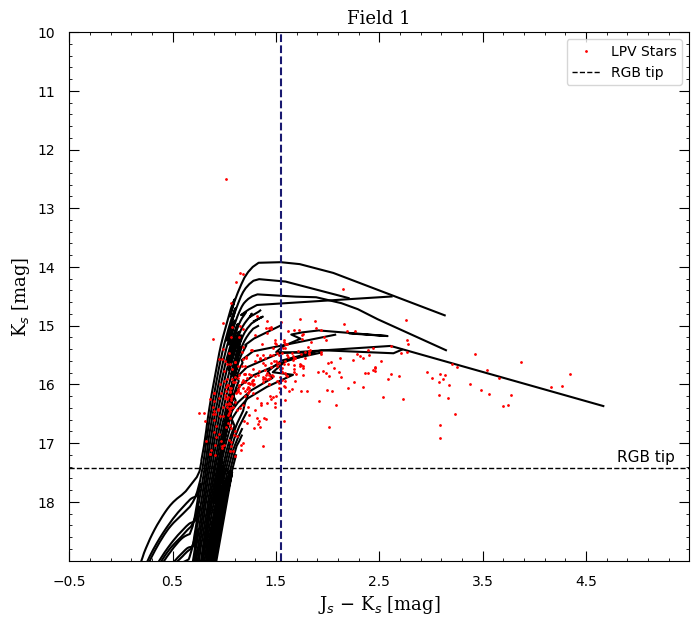

In [99]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [100]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [101]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 : 
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [102]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [103]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 : 
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 : 
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [104]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.0880078932503066
Slope_O : 0.6101104882821714


It is better to increase the slope manually.

In [105]:
Slope_C = Slope_C + 0.3

In [106]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.3880078932503066
Slope_O : 0.6101104882821714


Slope : Visualization

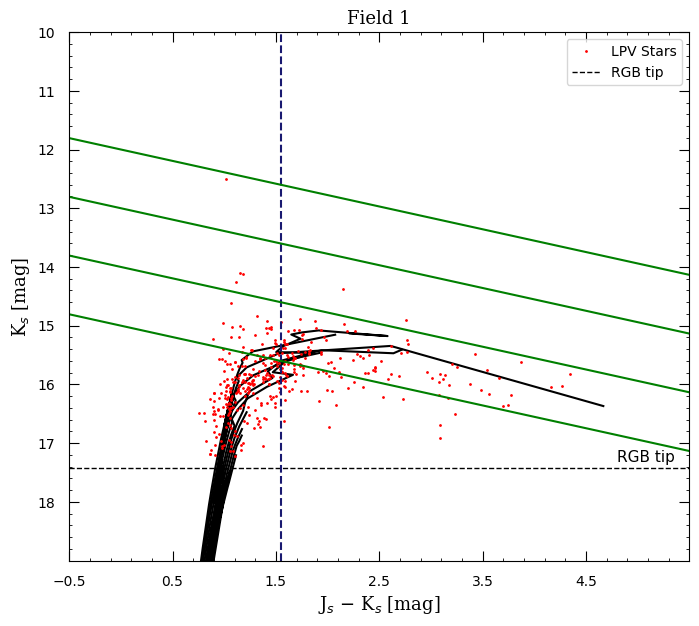

In [107]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

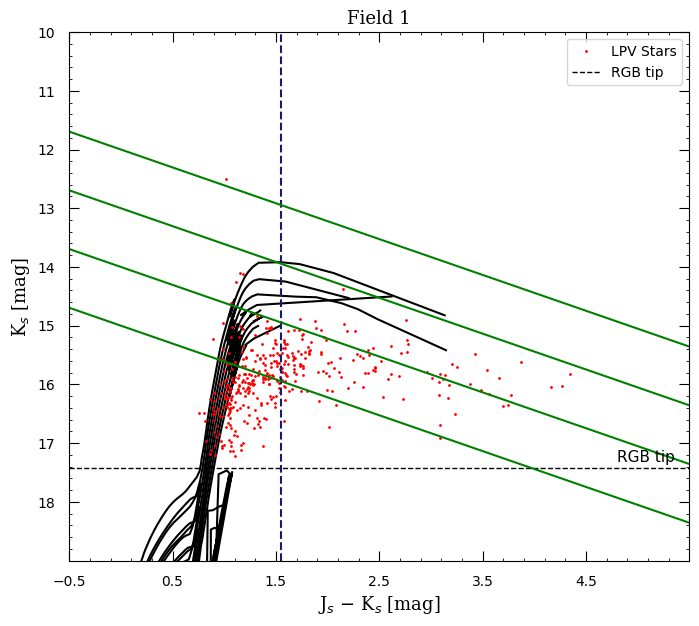

In [108]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [109]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [110]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

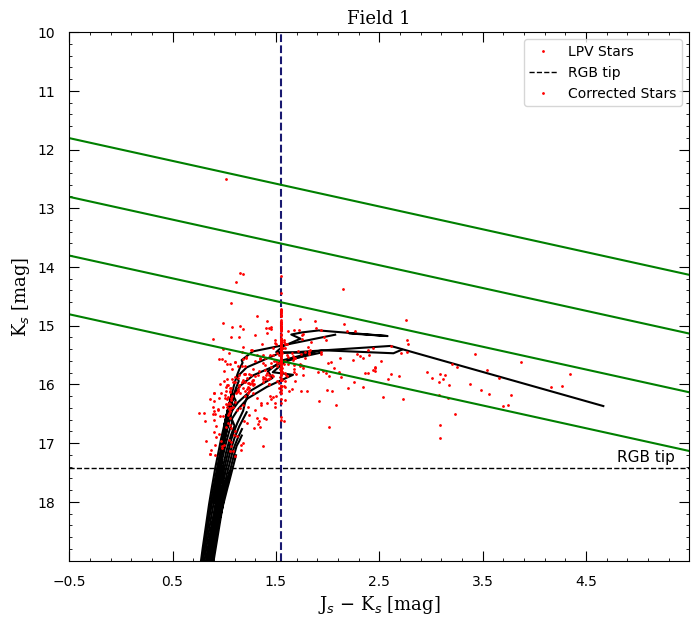

In [111]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [112]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [113]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.0008,-0.132,0.184,NaN,-12.015
1,0.0008,-0.237,-1.086,-12.015,-11.552
2,0.0008,-0.709,-6.537,-11.552,-11.089
3,0.0008,-0.214,-1.047,-11.089,-10.627
4,0.0008,-0.278,-1.730,-10.627,-10.164
5,0.0008,-0.668,-5.686,-10.164,-9.701
6,0.0008,-0.402,-3.107,-9.701,-9.238
7,0.0008,-0.114,-0.445,-9.238,-8.775
8,0.0008,-0.470,-3.570,-8.775,-8.312
9,0.0008,-0.287,-2.053,-8.312,-7.849


In [114]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [115]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [116]:
print(f'a: {a}   b: {b}')

a: -0.199   b: -1.257


$Log(M/M_s) = a \times K_s + b$

In [117]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [118]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

8
C Star --> 8
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
12
C Star --> 12
13
C Star --> 13
14
C Star --> 14
15
C Star --> 15
16
C Star --> 16
18
C Star --> 18
19
C Star --> 19
20
C Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
C Star --> 24
25
C Star --> 25
27
C Star --> 27
28
C Star --> 28
30
C Star --> 30
32
C Star --> 32
33
C Star --> 33
41
C Star --> 41
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
C Star --> 56
57
C Star --> 57
58
C Star --> 58
59
C Star --> 59
60
C Star --> 60
61
C Star --> 61
62
C Star --> 62
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
66
C Star --> 66
67
C Star --> 67
68
C Star --> 68
69
C Star --> 69
70
C Star --> 70
71
C Star --> 71
72
C Star --> 72
73
C Star --> 73
74
C Star --> 74
75
C Star --> 75
76
C Star --> 76
77
C Star --> 77
78
C Star --> 78
79
C Star --> 79
80
C Star --> 80
81
C Star --> 81
82
C Star --> 82
83
O Star --> 83
8

In [119]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks
Mid,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340
...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108


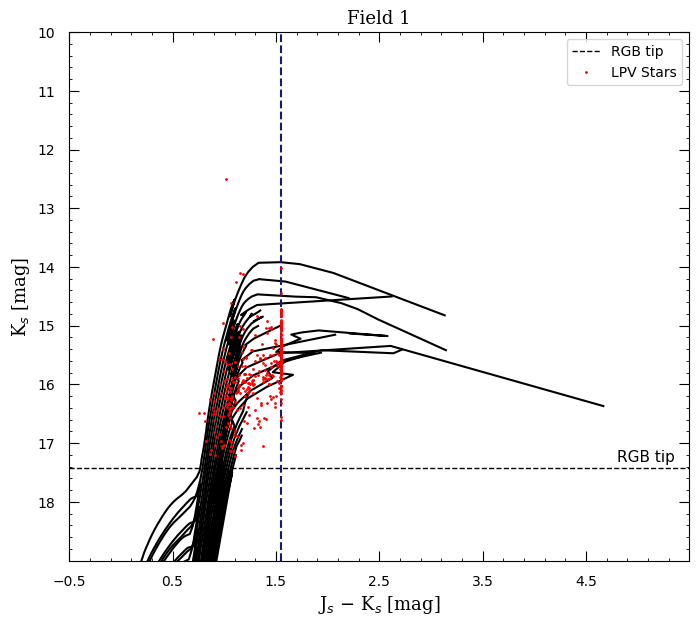

In [120]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [158]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
Mid,,,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.174220,1.493551,9.261293,1.825126e+09,5.819921,660572.863794
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.172880,1.488950,9.264759,1.839753e+09,5.812549,649455.391259
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.163500,1.457136,9.289025,1.945474e+09,5.760062,575521.481526
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.170200,1.479790,9.271693,1.869359e+09,5.797694,627615.933744
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,0.100180,1.259447,9.472828,2.970492e+09,5.456310,285962.959646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,0.030132,1.071845,9.695301,4.957934e+09,5.352699,225267.575785
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,0.001550,1.003575,9.786077,6.110506e+09,5.377802,238672.105908
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.015260,0.965473,9.839466,6.909805e+09,5.405568,254429.772761


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [159]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [160]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
70,0.0008,-0.132,0.184,NaN,-12.015
71,0.0008,-0.237,-1.086,-12.015,-11.552
72,0.0008,-0.709,-6.537,-11.552,-11.089
73,0.0008,-0.214,-1.047,-11.089,-10.627
74,0.0008,-0.278,-1.730,-10.627,-10.164
75,0.0008,-0.668,-5.686,-10.164,-9.701
76,0.0008,-0.402,-3.107,-9.701,-9.238
77,0.0008,-0.114,-0.445,-9.238,-8.775
78,0.0008,-0.470,-3.570,-8.775,-8.312
79,0.0008,-0.287,-2.053,-8.312,-7.849


In [161]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [162]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.47   b: -3.57


In [163]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [164]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
Mid,,,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.174220,1.493551,9.261293,1.825126e+09,5.819921,660572.863794
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.172880,1.488950,9.264759,1.839753e+09,5.812549,649455.391259
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.163500,1.457136,9.289025,1.945474e+09,5.760062,575521.481526
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.170200,1.479790,9.271693,1.869359e+09,5.797694,627615.933744
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,0.100180,1.259447,9.472828,2.970492e+09,5.456310,285962.959646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,0.030132,1.071845,9.695301,4.957934e+09,5.352699,225267.575785
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,0.001550,1.003575,9.786077,6.110506e+09,5.377802,238672.105908
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.015260,0.965473,9.839466,6.909805e+09,5.405568,254429.772761


(array([ 44., 232.,  66.,  28.,   8.,   3.,   0.,   0.,   0.,   1.]),
 array([-0.01526 ,  0.115896,  0.247052,  0.378208,  0.509364,  0.64052 ,
         0.771676,  0.902832,  1.033988,  1.165144,  1.2963  ]),
 <BarContainer object of 10 artists>)

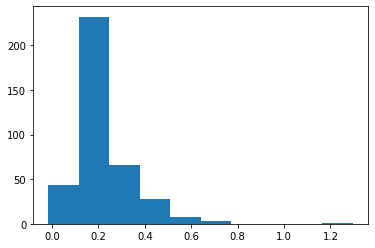

In [165]:
plt.hist(df_final['Log(M/Ms)'])

(array([364.,  16.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.9654727 ,  2.84726119,  4.72904967,  6.61083816,  8.49262664,
        10.37441512, 12.25620361, 14.13799209, 16.01978057, 17.90156906,
        19.78335754]),
 <BarContainer object of 10 artists>)

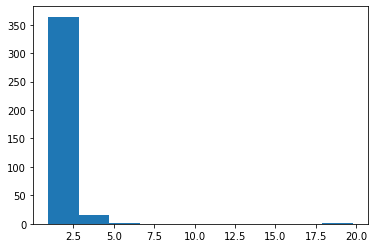

In [166]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [167]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [168]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
64,0.0008,-3.176,9.791,NaN,0.134
65,0.0008,-2.587,9.712,0.134,0.375
66,0.0008,-2.452,9.661,0.375,0.617
67,0.0008,-2.005,9.385,0.617,0.859
68,0.0008,-1.684,9.110,0.859,1.101
69,0.0008,-1.250,8.632,1.101,1.343
70,0.0008,-0.864,8.114,1.343,1.585
71,0.0008,-0.605,7.703,1.585,NaN


In [169]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [170]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.587   b: 9.712


In [171]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.154

In [172]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [173]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
Mid,,,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.174220,1.493551,9.261293,1.825126e+09,5.819921,660572.863794
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.172880,1.488950,9.264759,1.839753e+09,5.812549,649455.391259
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.163500,1.457136,9.289025,1.945474e+09,5.760062,575521.481526
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.170200,1.479790,9.271693,1.869359e+09,5.797694,627615.933744
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,0.100180,1.259447,9.472828,2.970492e+09,5.456310,285962.959646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,0.030132,1.071845,9.695301,4.957934e+09,5.352699,225267.575785
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,0.001550,1.003575,9.786077,6.110506e+09,5.377802,238672.105908
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.015260,0.965473,9.839466,6.909805e+09,5.405568,254429.772761


(array([  1.,   0.,   0.,   3.,   8.,  22.,  46., 204.,  72.,  26.]),
 array([7.011625  , 7.29440908, 7.57719315, 7.85997723, 8.1427613 ,
        8.42554538, 8.70832946, 8.99111353, 9.27389761, 9.55668168,
        9.83946576]),
 <BarContainer object of 10 artists>)

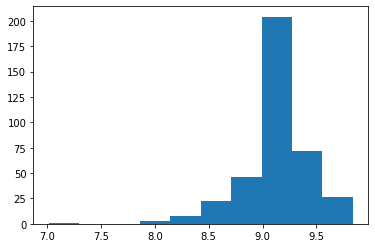

In [174]:
plt.hist(df_final['Log(t)'])

(array([ 49.,  79., 173.,  40.,  13.,   5.,   6.,   8.,   5.,   4.]),
 array([1.02712902e+07, 7.00224611e+08, 1.39017793e+09, 2.08013125e+09,
        2.77008457e+09, 3.46003790e+09, 4.14999122e+09, 4.83994454e+09,
        5.52989786e+09, 6.21985118e+09, 6.90980450e+09]),
 <BarContainer object of 10 artists>)

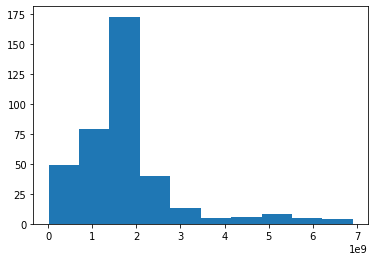

In [175]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [176]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [177]:
Mass_Pulsation

,Z,I,a,b,c,D
20,0.0008,1,1.255,0.587,0.169,-4.489
21,0.0008,2,0.636,1.138,0.088,0.000
22,0.0008,3,3.410,1.714,0.389,0.000
23,0.0008,4,1.483,0.266,0.155,0.000


In [178]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D 

In [179]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 0.636   b: 1.138  c: 0.088  D: -4.489


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [180]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)
  
  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [181]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
Mid,,,,,,,,,,,,,
1,10870.00,296.178920,-14.822860,17.320,16.120,S,1.200,0.174220,1.493551,9.261293,1.825126e+09,5.819921,660572.863794
2,10784.00,296.215450,-14.834690,17.250,16.130,S,1.120,0.172880,1.488950,9.264759,1.839753e+09,5.812549,649455.391259
3,11004.00,296.273410,-14.808610,17.400,16.200,S,1.200,0.163500,1.457136,9.289025,1.945474e+09,5.760062,575521.481526
4,11029.00,296.283080,-14.804970,17.260,16.150,S,1.110,0.170200,1.479790,9.271693,1.869359e+09,5.797694,627615.933744
5,12050.00,296.254270,-14.817640,17.970,16.630,S,1.340,0.100180,1.259447,9.472828,2.970492e+09,5.456310,285962.959646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,89.99,295.976105,-14.796489,18.050,16.982,C,1.068,0.030132,1.071845,9.695301,4.957934e+09,5.352699,225267.575785
379,89.99,296.003693,-14.974893,18.192,17.140,C,1.052,0.001550,1.003575,9.786077,6.110506e+09,5.377802,238672.105908
380,89.99,297.181274,-14.445981,18.330,17.222,C,1.108,-0.015260,0.965473,9.839466,6.909805e+09,5.405568,254429.772761


(array([  1.,   0.,   0.,   1.,   2.,  14.,  17.,  69.,  61., 217.]),
 array([3.62413112, 3.86842029, 4.11270946, 4.35699863, 4.6012878 ,
        4.84557697, 5.08986614, 5.33415531, 5.57844448, 5.82273365,
        6.06702282]),
 <BarContainer object of 10 artists>)

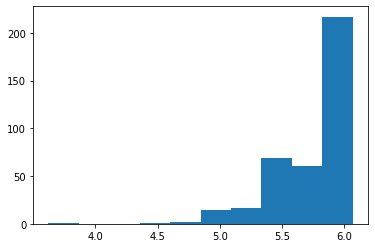

In [182]:
plt.hist(df_final['Log(dt)'])

(array([18., 40., 41., 29., 19., 26., 85., 53., 24., 47.]),
 array([   4208.5367443 ,  120474.77543471,  236741.01412513,
         353007.25281555,  469273.49150597,  585539.73019639,
         701805.96888681,  818072.20757723,  934338.44626765,
        1050604.68495807, 1166870.92364849]),
 <BarContainer object of 10 artists>)

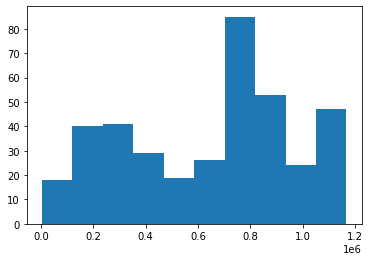

In [183]:
plt.hist(df_final['dt'])

## Data Saving

In [184]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)

#Star Formation History

In [185]:
df_final = df_final.sort_values(by='t', ascending=False)
df_final = df_final.reset_index()

In [186]:
df_final

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,380,89.99,297.181274,-14.445981,18.330,17.222000,C,1.108,-0.015260,0.965473,9.839466,6.909805e+09,5.405568,254429.772761
1,150,89.99,296.204498,-14.674287,18.120,17.210000,C,0.910,-0.012800,0.970957,9.831653,6.786609e+09,5.401007,251772.003311
2,175,89.99,295.776978,-15.241439,18.040,17.180000,C,0.860,-0.006650,0.984804,9.812120,6.488143e+09,5.390323,245653.441875
3,191,89.99,296.333038,-14.770712,18.040,17.180000,C,0.860,-0.006650,0.984804,9.812120,6.488143e+09,5.390323,245653.441875
4,379,89.99,296.003693,-14.974893,18.192,17.140000,C,1.052,0.001550,1.003575,9.786077,6.110506e+09,5.377802,238672.105908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,285,89.99,296.365631,-14.891643,15.362,14.248000,C,1.114,0.604028,4.018167,8.179923,1.513294e+08,4.946993,88510.191560
378,42,10198.00,296.250880,-14.767860,15.300,14.120000,O,1.180,0.643660,4.402101,8.094462,1.242973e+08,4.732708,54039.112243
379,44,10091.00,296.267020,-14.763110,15.260,14.110000,O,1.150,0.647680,4.443038,8.086402,1.220117e+08,4.705912,50805.637543
380,83,30268.00,296.258910,-14.887960,16.530,14.012713,LPV,1.548,0.686789,4.861711,8.007988,1.018563e+08,4.408692,25626.658699


In [187]:
df_final['alpha'] = np.nan
for i in df_final.index:
  if df_final.loc[i,'M/Ms'] < 0.08 :
     df_final.loc[i,'alpha'] = 0.3
  elif df_final.loc[i,'M/Ms'] >= 0.5 :
     df_final.loc[i,'alpha'] = 2.3
  else :
     df_final.loc[i,'alpha'] = 1.3  

(array([  0.,   0.,   0.,   0.,   0., 382.,   0.,   0.,   0.,   0.]),
 array([1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8]),
 <BarContainer object of 10 artists>)

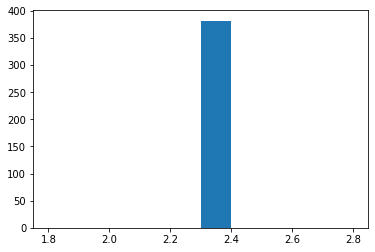

In [188]:
plt.hist(df_final['alpha'])

In [189]:
bins_number = 20
bins_with_more_stars = 2
bins_pop = ([19]*(bins_number-bins_with_more_stars)) + ([20]*bins_with_more_stars)

In [190]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df_final[lower_index:lower_index+i]

  # Calculating limitation of each bin 
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[0]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[-1]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
  
  XI_ = p1 * p2 * (1/p3)
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

In [191]:
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
           'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
           'Mean log(t) error' , 'XI' , 'XI error'] 
# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                               M_lower_limit,M_upper_limit,alpha,log_t,
                               log_t_err,XI,XI_err)), columns =columns)

In [192]:
SFH_df

,log(t) (lower limit),log(t) (upper limit),M (lower limit),M (upper limit),Alpha,Mean log(t),Mean log(t) error,XI,XI error
0,9.839466,9.681396,0.965473,1.082705,2.3,9.760431,-0.079035,0.002973,0.000682
1,9.675076,9.464612,1.087677,1.266972,2.3,9.569844,-0.105232,0.002476,0.000568
2,9.461576,9.373864,1.269764,1.353131,2.3,9.417720,-0.043856,0.005131,0.001177
3,9.373864,9.331211,1.353131,1.403438,2.3,9.352538,-0.021327,0.007660,0.001757
4,9.330624,9.289025,1.404171,1.457136,2.3,9.309825,-0.020799,0.006399,0.001468
5,9.289025,9.257826,1.457136,1.498166,2.3,9.273426,-0.015600,0.007304,0.001676
6,9.257826,9.235772,1.498166,1.527865,2.3,9.246799,-0.011027,0.009344,0.002144
7,9.234957,9.229162,1.528974,1.536880,2.3,9.232060,-0.002897,0.034454,0.007904
8,9.228619,9.224092,1.537623,1.543832,2.3,9.226355,-0.002264,0.043157,0.009901
9,9.223277,9.217301,1.544952,1.553191,2.3,9.220289,-0.002988,0.032003,0.007342


<ipython-input-193-21381d7f857d>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


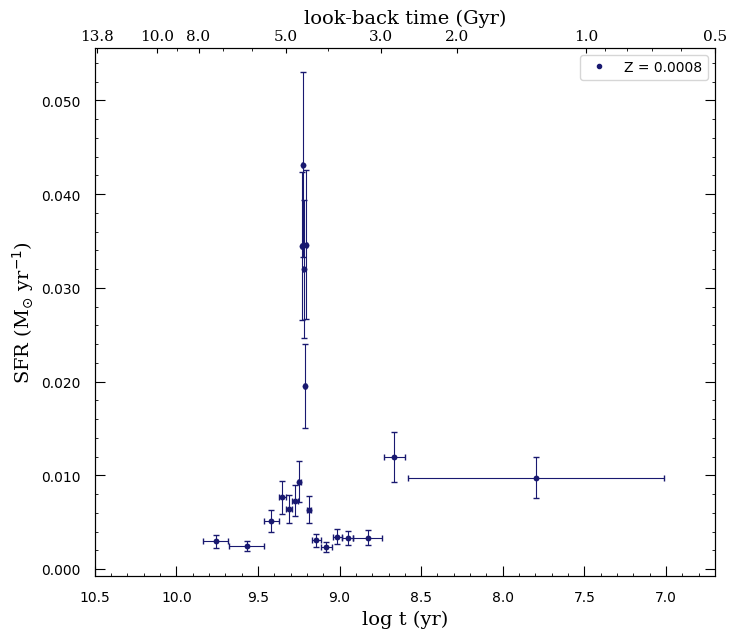

In [193]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(10.5,6.7)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
             SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

Saving Data 

In [194]:
SFH_df.to_csv('NGC6822_SFH_Data_'+ Z_name +'.csv', index=False)